<a href="https://colab.research.google.com/github/PranavRathod399/Blacklace/blob/main/Blackjack/Amp-files/Graphene_Amplifier_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original SNR: 17.72 dB


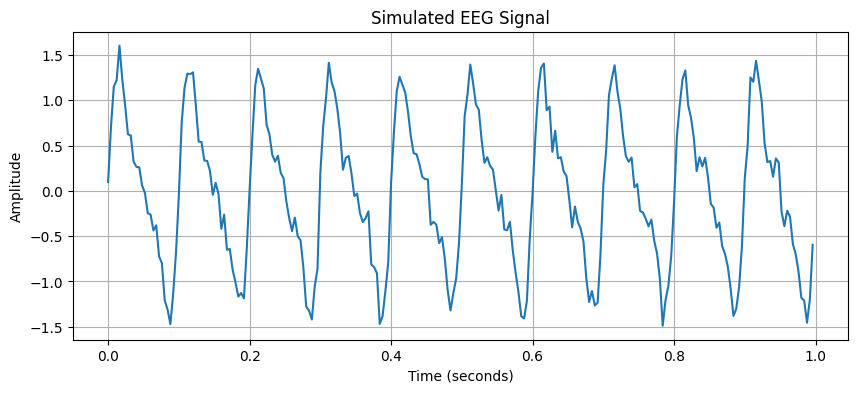

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_eeg(duration, fs, frequencies, amplitudes):
    """Simulates EEG data with specified frequencies and amplitudes."""
    time = np.arange(0, duration, 1/fs)
    signal = np.zeros_like(time, dtype=float)
    for freq, amp in zip(frequencies, amplitudes):
        signal += amp * np.sin(2 * np.pi * freq * time)
    # Add noise (optional)
    noise = np.random.normal(scale=0.1, size=len(time))  # Adjust scale for noise level
    signal += noise
    return time, signal, noise # Return noise as well

def calculate_snr(signal, noise):
    """Calculates the Signal-to-Noise Ratio (SNR) in dB."""
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

# Example usage
duration = 1  # seconds
fs = 250  # sampling frequency
frequencies = [10, 20, 30]  # Hz
amplitudes = [1, 0.5, 0.2]
time, simulated_eeg_data, noise = simulate_eeg(duration, fs, frequencies, amplitudes)

# Calculate and print SNR of the original signal
original_snr = calculate_snr(simulated_eeg_data, noise)
print(f"Original SNR: {original_snr:.2f} dB")

# Plot the simulated EEG data
plt.figure(figsize=(10, 4))
plt.plot(time, simulated_eeg_data)
plt.title('Simulated EEG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Filtered SNR: 17.46 dB


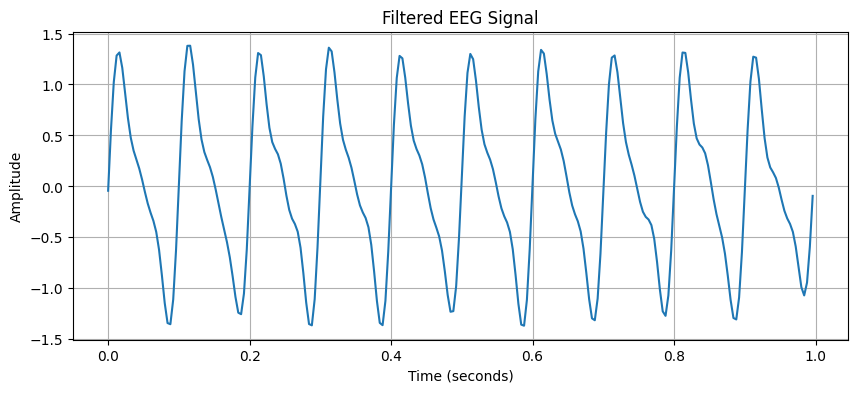

In [ ]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    """Designs a Butterworth bandpass filter."""
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """Applies a bandpass filter to the data."""
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Example usage
lowcut = 5  # Hz
highcut = 35  # Hz
filtered_eeg = apply_bandpass_filter(simulated_eeg_data, lowcut, highcut, fs)

# Calculate and print SNR of the filtered signal
filtered_snr = calculate_snr(filtered_eeg, noise)  # Use the same noise data
print(f"Filtered SNR: {filtered_snr:.2f} dB")

# Plot the filtered EEG data
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_eeg)
plt.title('Filtered EEG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Amplified SNR: 37.46 dB


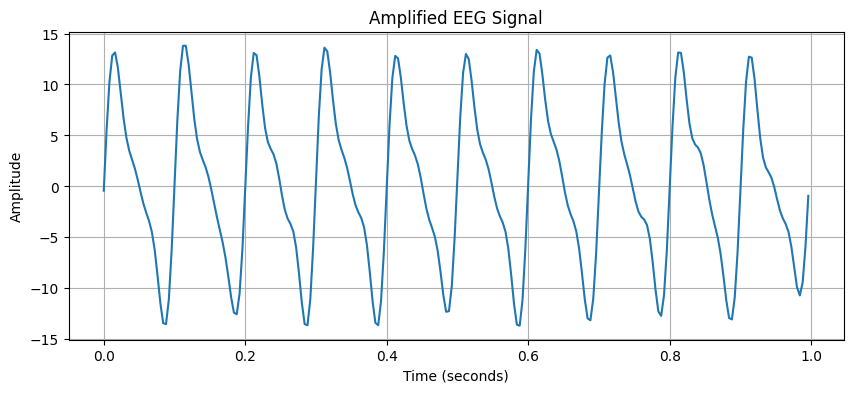

In [ ]:
def graphene_amplifier(signal, gain):
    """Simulates a graphene amplifier with a specified gain."""
    # Replace with more complex model for realistic simulation
    amplified_signal = signal * gain
    return amplified_signal

# Example usage
gain = 10
amplified_eeg = graphene_amplifier(filtered_eeg, gain)

# Calculate and print SNR of the amplified signal
amplified_snr = calculate_snr(amplified_eeg, noise)  # Use the same noise data
print(f"Amplified SNR: {amplified_snr:.2f} dB")

# Plot the amplified EEG data
plt.figure(figsize=(10, 4))
plt.plot(time, amplified_eeg)
plt.title('Amplified EEG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

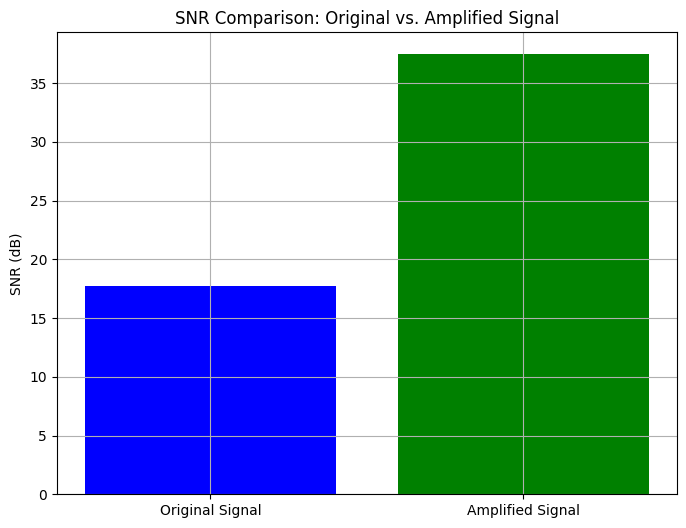

Original SNR: 17.72 dB
Amplified SNR: 37.46 dB
SNR Improvement: 19.74 dB


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code for simulating EEG data, filtering, and amplification) ...

# SNR Comparison
snr_values = [original_snr, amplified_snr]
labels = ['Original Signal', 'Amplified Signal']

plt.figure(figsize=(8, 6))
plt.bar(labels, snr_values, color=['blue', 'green'])
plt.title('SNR Comparison: Original vs. Amplified Signal')
plt.ylabel('SNR (dB)')
plt.grid(True)
plt.show()

# Print SNR values for comparison
print(f"Original SNR: {original_snr:.2f} dB")
print(f"Amplified SNR: {amplified_snr:.2f} dB")

# Calculate and print SNR improvement
snr_improvement = amplified_snr - original_snr
print(f"SNR Improvement: {snr_improvement:.2f} dB")